In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [62]:

sample_package_delivery = lambda t : lambda n : np.random.normal(t, 3600, n)

package_delivery_choices = lambda d, n : sample_package_delivery(9*3600*d)(n)

exp_distribution = lambda lambda_ : lambda x : lambda_ * np.exp(-lambda_ * x)
my_exp = exp_distribution(0.3)
exp_probs = lambda d : [my_exp(i)/sum([my_exp(j) for j in range(d)]) for i in range(d)]


samples_for_days = lambda d : lambda n : np.concatenate([package_delivery_choices(i+1, n) for i, n in
                                                    zip(*np.unique(np.random.choice(list(range(d)), size=n, p=exp_probs(d)), return_counts=True))
                                         ])

five_days = samples_for_days(5)

data = five_days(100)

In [69]:
mu, std = stats.norm.fit(data)

(array([ 3.,  4.,  3.,  2.,  9.,  3.,  2.,  2.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  4.,
         1., 10.,  4.,  2.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  3.,  1.,
         4.,  0.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  3.,  0.,  0.,  0.,  1.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  3.,  3.,  2.,  3.,  1.,  3.]),
 array([ 24028.45552184,  25459.83892942,  26891.222337  ,  28322.60574458,
         29753.98915217,  31185.37255975,  32616.75596733,  34048.13937492,
         35479.5227825 ,  36910.90619008,  38342.28959767,  39773.67300525,
         41205.05641283,  42636.43982041,  44067.823228  ,  45499.20663558,
         46930.59004316,  48361.97345075,  49793.35685833,  51224.74026591,
         52656.12367349,  54087.50708108,  55518.89048

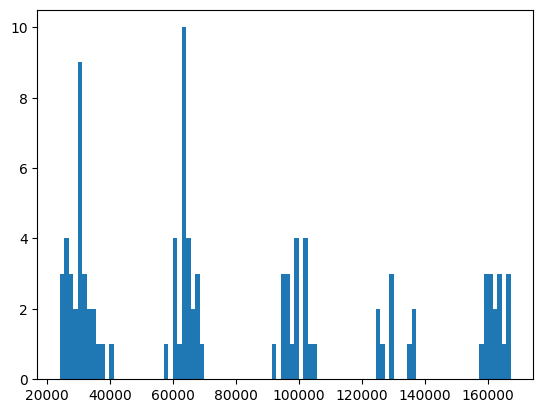

In [63]:
plt.hist(data, bins=100)

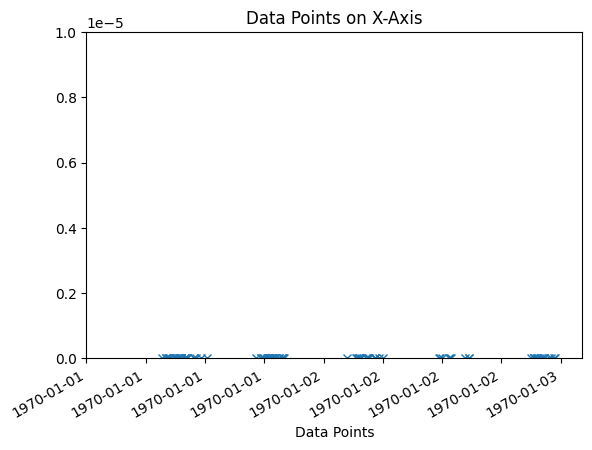

In [89]:
# Plot the data as small crosses on the x-axis
dates = [datetime.fromtimestamp(ts) for ts in data]
plt.plot(dates, np.zeros_like(data), 'x')

# Customize the plot (optional)
plt.xlim(0, max(dates)+timedelta(seconds=10000))  # Adjust x-axis limits
plt.ylim(0, 0.00001)  # Adjust y-axis limits


#plt.yticks([])  # Remove y-axis ticks

#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#p = stats.norm.pdf([i.timestamp() for i in x], mu, std)
#plt.plot(x, p, 'k')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability


plt.xlabel("Data Points")
plt.title("Data Points on X-Axis")

plt.show()

In [88]:
x

array([0.        , 0.02113342, 0.04226683, 0.06340025, 0.08453367,
       0.10566709, 0.1268005 , 0.14793392, 0.16906734, 0.19020075,
       0.21133417, 0.23246759, 0.253601  , 0.27473442, 0.29586784,
       0.31700126, 0.33813467, 0.35926809, 0.38040151, 0.40153492,
       0.42266834, 0.44380176, 0.46493518, 0.48606859, 0.50720201,
       0.52833543, 0.54946884, 0.57060226, 0.59173568, 0.6128691 ,
       0.63400251, 0.65513593, 0.67626935, 0.69740276, 0.71853618,
       0.7396696 , 0.76080301, 0.78193643, 0.80306985, 0.82420327,
       0.84533668, 0.8664701 , 0.88760352, 0.90873693, 0.92987035,
       0.95100377, 0.97213719, 0.9932706 , 1.01440402, 1.03553744,
       1.05667085, 1.07780427, 1.09893769, 1.1200711 , 1.14120452,
       1.16233794, 1.18347136, 1.20460477, 1.22573819, 1.24687161,
       1.26800502, 1.28913844, 1.31027186, 1.33140528, 1.35253869,
       1.37367211, 1.39480553, 1.41593894, 1.43707236, 1.45820578,
       1.4793392 , 1.50047261, 1.52160603, 1.54273945, 1.56387